# Data Project - Stock Market Analysis 

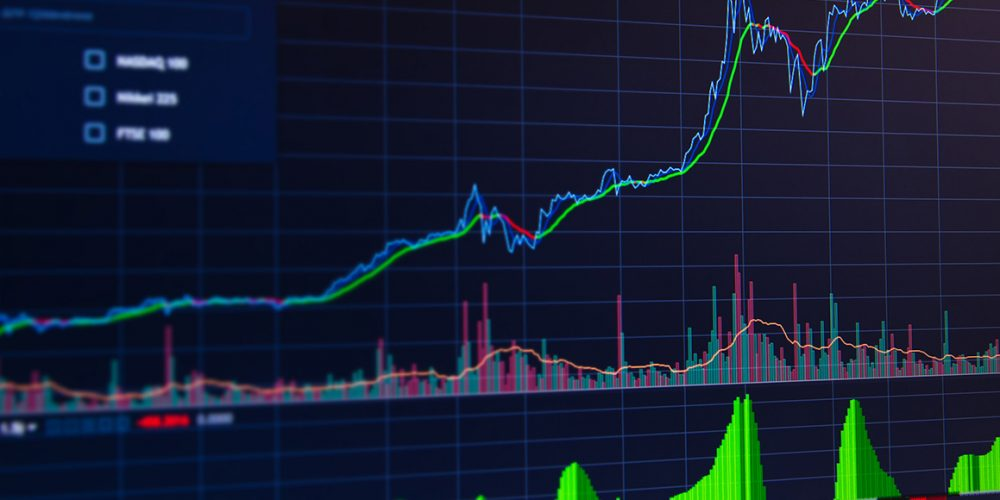

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [3]:
!pip install -q yfinance

In [4]:
import yfinance as yf
from datetime import datetime

# Menentukan kode saham
stock_symbol = 'INCO.JK'

# Set up End and Start times for data grab
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

# Menggunakan yfinance untuk mengambil data dari Yahoo Finance
inco_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Menampilkan 10 baris terakhir dari data
print(inco_data.tail(10))


[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2024-04-22  4450.0  4530.0  4400.0  4410.0     4410.0  34893100
2024-04-23  4440.0  4450.0  4340.0  4350.0     4350.0  21161800
2024-04-24  4350.0  4350.0  4210.0  4210.0     4210.0  16263000
2024-04-25  4210.0  4240.0  4050.0  4100.0     4100.0  19166500
2024-04-26  4120.0  4130.0  4010.0  4090.0     4090.0  11182000
2024-04-29  4090.0  4190.0  4080.0  4180.0     4180.0   6838500
2024-04-30  4200.0  4270.0  4160.0  4250.0     4250.0  10688100
2024-05-02  4250.0  4250.0  4080.0  4120.0     4120.0   8048200
2024-05-03  4120.0  4150.0  4040.0  4070.0     4070.0   5461400
2024-05-06  4120.0  4320.0  4120.0  4290.0     4290.0  11612700


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

# Setting up matplotlib and seaborn styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

# Initialize company_list with specific data
company_list = [
    yf.download("ANTM.JK", start="2012-01-01", end=datetime.now()),
    yf.download("DKFT.JK", start="2012-01-01", end=datetime.now()),
    yf.download("KKGI.JK", start="2012-01-01", end=datetime.now()),
    yf.download("INCO.JK", start="2012-01-01", end=datetime.now())
]

# Add company names to each DataFrame
company_names = ["ANTM.JK", "DKFT.JK", "KKGI.JK", "INCO.JK"]

for df, com_name in zip(company_list, company_names):
    df["company_name"] = com_name

# Concatenate the data for all companies
df = pd.concat(company_list, axis=0)

# Extracting DataFrames for each company
antm_data = df[df['company_name'] == 'ANTM.JK']
dkft_data = df[df['company_name'] == 'DKFT.JK']
kkgi_data = df[df['company_name'] == 'KKGI.JK']
inco_data = df[df['company_name'] == 'INCO.JK']

# Display the tail of the concatenated DataFrame
df.tail(10)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-22,4450.0,4530.0,4400.0,4410.0,4410.0,34893100,INCO.JK
2024-04-23,4440.0,4450.0,4340.0,4350.0,4350.0,21161800,INCO.JK
2024-04-24,4350.0,4350.0,4210.0,4210.0,4210.0,16263000,INCO.JK
2024-04-25,4210.0,4240.0,4050.0,4100.0,4100.0,19166500,INCO.JK
2024-04-26,4120.0,4130.0,4010.0,4090.0,4090.0,11182000,INCO.JK
2024-04-29,4090.0,4190.0,4080.0,4180.0,4180.0,6838500,INCO.JK
2024-04-30,4200.0,4270.0,4160.0,4250.0,4250.0,10688100,INCO.JK
2024-05-02,4250.0,4250.0,4080.0,4120.0,4120.0,8048200,INCO.JK
2024-05-03,4120.0,4150.0,4040.0,4070.0,4070.0,5461400,INCO.JK


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [6]:
dkft_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3.049000e+03
mean,280.664480,284.662184,276.408659,280.394228,267.975346,1.119052e+07
std,130.786719,131.376503,129.997863,131.015832,121.601221,3.923078e+07
min,65.000000,74.000000,65.000000,69.000000,69.000000,0.000000e+00
25%,135.000000,138.000000,132.000000,134.000000,134.000000,1.470000e+05
50%,320.000000,326.000000,314.000000,320.000000,272.049713,1.774600e+06
75%,397.000000,397.000000,397.000000,397.000000,397.000000,8.117700e+06
max,630.000000,660.000000,620.000000,630.000000,504.766998,8.863214e+08


In [7]:
kkgi_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3.049000e+03
mean,359.858050,367.710476,352.150289,359.441186,293.012614,2.035864e+06
std,228.531590,233.069472,224.986638,228.433794,165.921440,4.201830e+06
min,73.359070,74.324326,71.428574,74.324326,59.229256,0.000000e+00
25%,218.146713,223.938217,210.424713,216.216217,178.278275,1.029780e+05
50%,324.324310,332.046326,318.532806,324.324310,259.206390,6.052310e+05
75%,416.988403,428.571442,409.266418,416.988403,361.225250,2.098107e+06
max,1640.926636,1640.926636,1602.316650,1640.926636,1118.967773,7.257087e+07


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [8]:
inco_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3.048000e+03
mean,3667.239173,3726.794619,3599.972113,3659.237205,3561.122879,1.380673e+07
std,1480.399358,1499.863158,1452.933874,1476.426891,1484.637802,1.521818e+07
min,1285.000000,1345.000000,1190.000000,1250.000000,1221.845459,0.000000e+00
25%,2620.000000,2670.000000,2567.500000,2620.000000,2475.145752,5.651500e+06
50%,3332.500000,3372.500000,3277.500000,3330.000000,3198.643555,9.689600e+06
75%,4362.500000,4450.000000,4290.000000,4350.000000,4271.572266,1.699102e+07
max,8700.000000,8800.000000,8400.000000,8675.000000,8558.988281,2.561385e+08


In [9]:
# General info
antm_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3049 entries, 2012-01-02 to 2024-05-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3049 non-null   float64
 1   High          3049 non-null   float64
 2   Low           3049 non-null   float64
 3   Close         3049 non-null   float64
 4   Adj Close     3049 non-null   float64
 5   Volume        3049 non-null   int64  
 6   company_name  3049 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 190.6+ KB


In [10]:
dkft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3049 entries, 2012-01-02 to 2024-05-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3049 non-null   float64
 1   High          3049 non-null   float64
 2   Low           3049 non-null   float64
 3   Close         3049 non-null   float64
 4   Adj Close     3049 non-null   float64
 5   Volume        3049 non-null   int64  
 6   company_name  3049 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 190.6+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

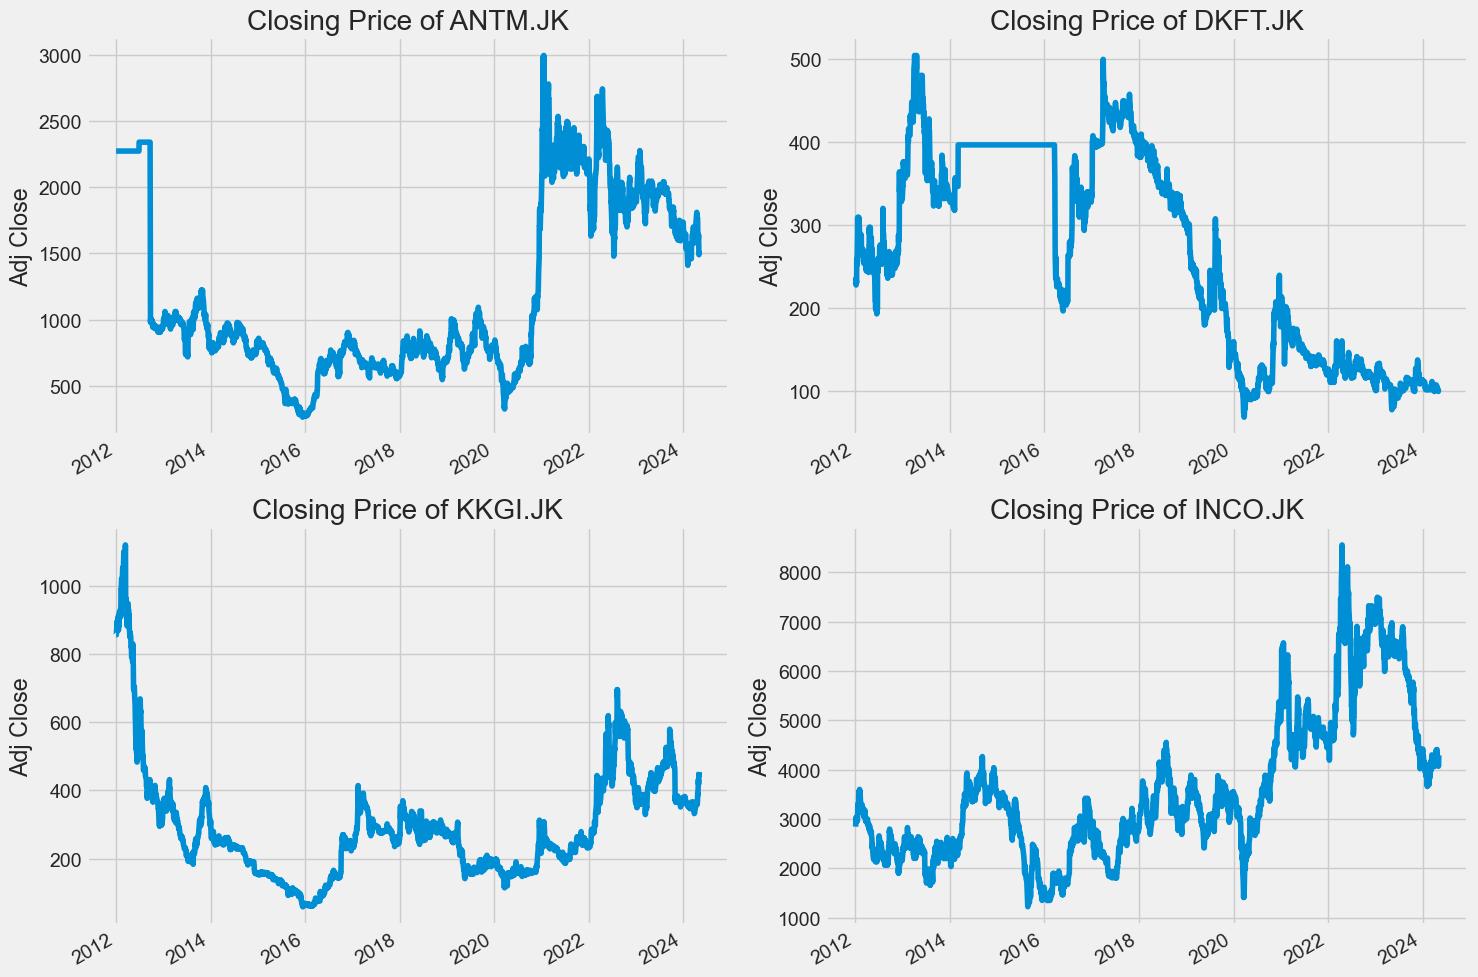

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

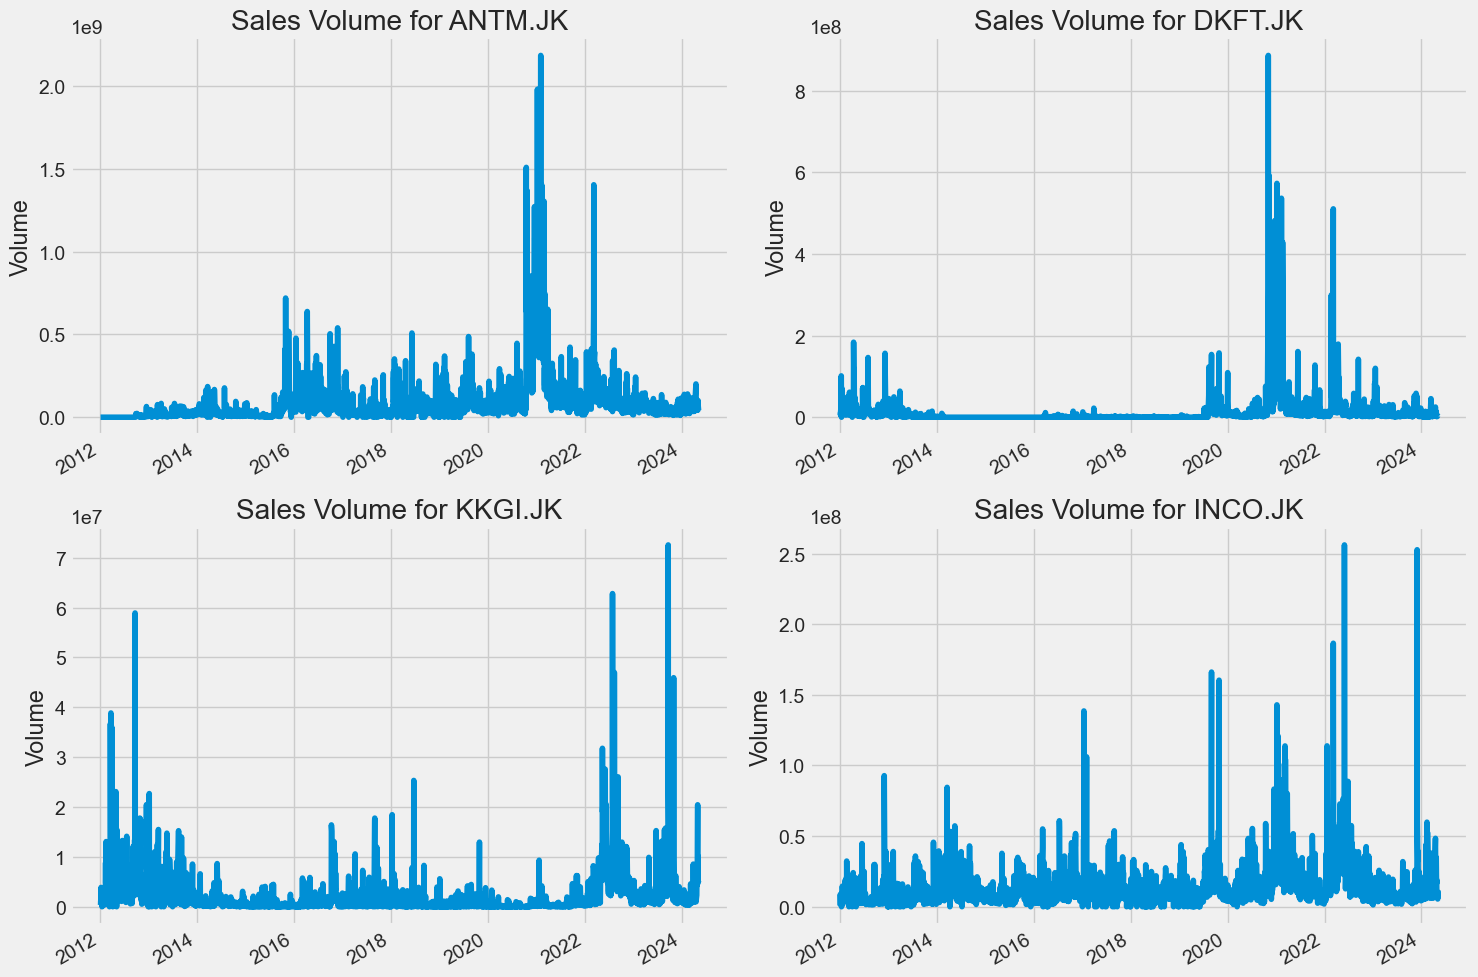

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/2879071959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/2879071959.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/2879071959.py:11: SettingWithCopyWarning: 
A value is trying to

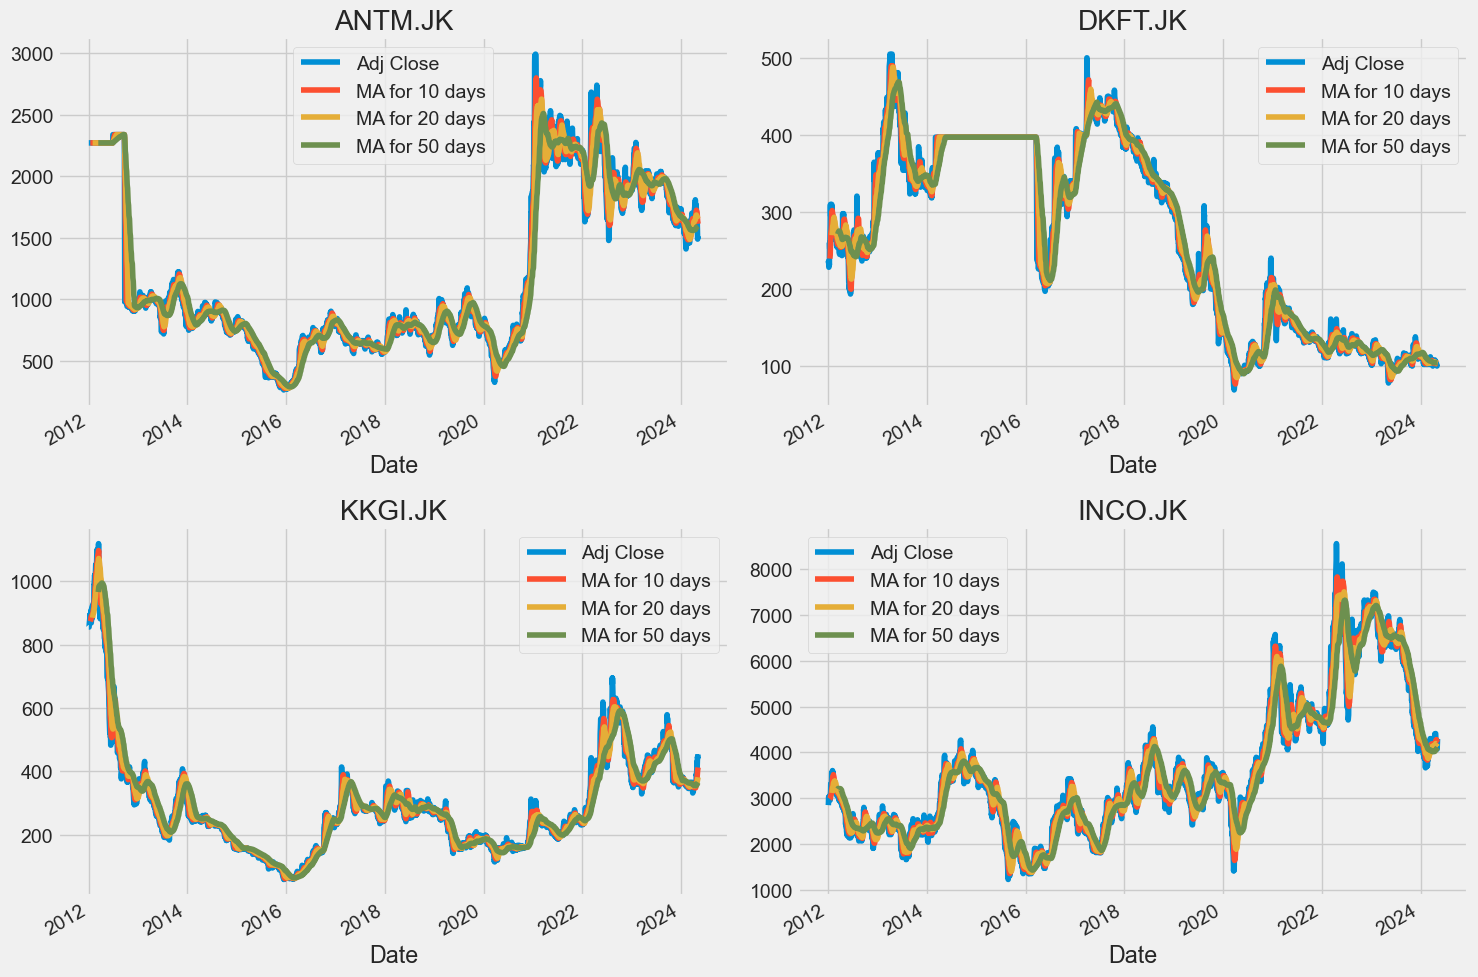

In [13]:
# Define the company_list or use the company_data dictionary created earlier
company_list = [antm_data, dkft_data, kkgi_data, inco_data]

# Define the moving averages
ma_day = [10, 20, 50]

# Calculate moving averages for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot for ANTM.JK
antm_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ANTM.JK')

# Plot for DKFT.JK
dkft_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('DKFT.JK')

# Plot for KKGI.JK
kkgi_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('KKGI.JK')

# Plot for INCO.JK
inco_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('INCO.JK')

# Adjust layout
fig.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/3693471802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily Return'] = company_data['Adj Close'].pct_change()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/3693471802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Daily Return'] = company_data['Adj Close'].pct_change()
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/3693471802.py:3: SettingWithCopyWarning: 
A value i

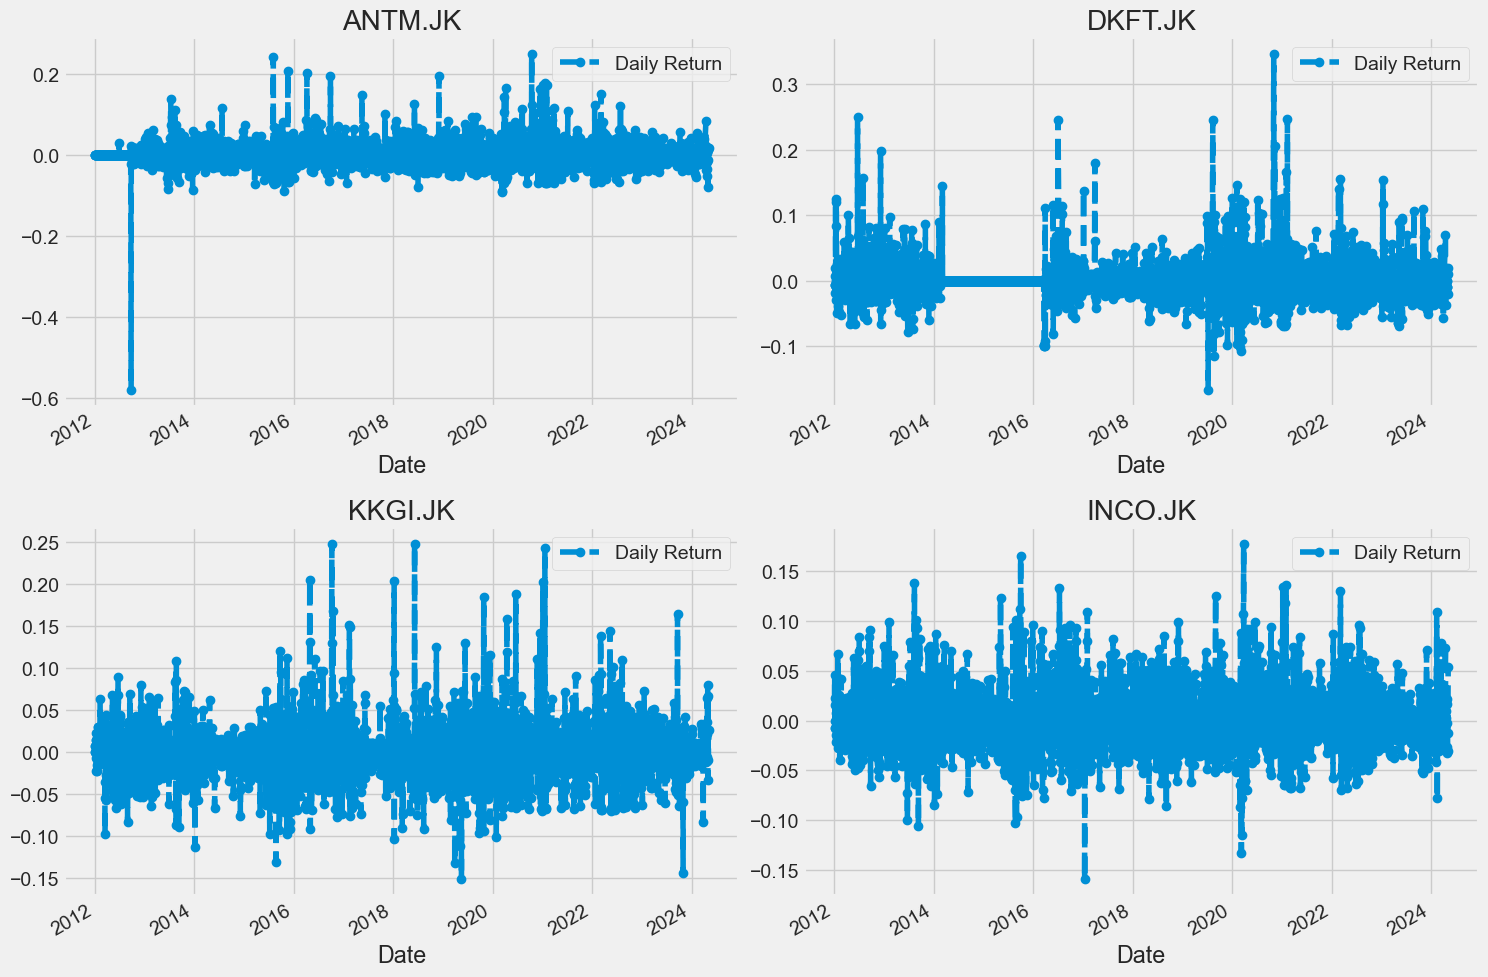

In [14]:
# Assuming you have calculated 'Daily Return' for each company in company_list
for company_data, company_name in zip([antm_data, dkft_data, kkgi_data, inco_data], ['ANTM.JK', 'DKFT.JK', 'KKGI.JK', 'INCO.JK']):
    company_data['Daily Return'] = company_data['Adj Close'].pct_change()

# Now, plot the daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

antm_data['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('ANTM.JK')

dkft_data['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('DKFT.JK')

kkgi_data['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('KKGI.JK')

inco_data['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('INCO.JK')

fig.tight_layout()
plt.show()


Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

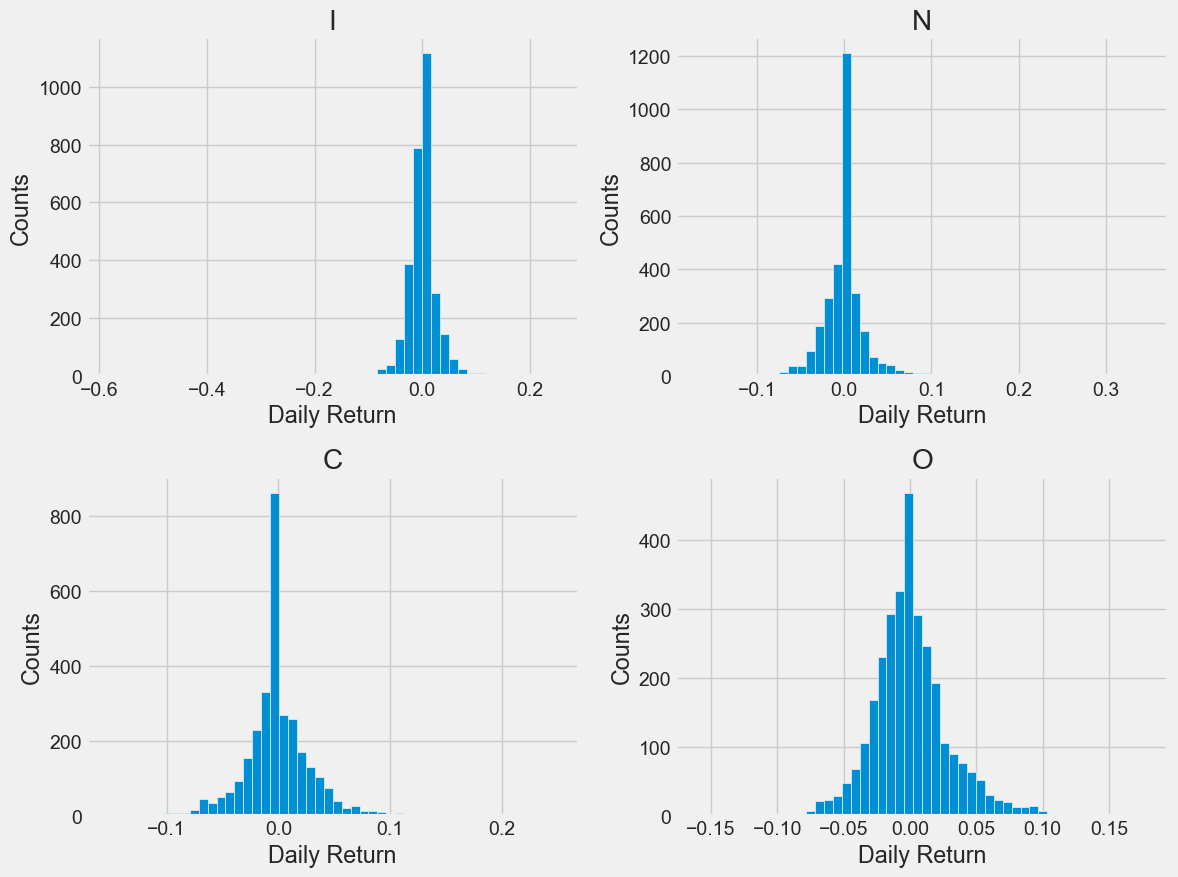

In [15]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [16]:
import yfinance as yf
from datetime import datetime

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Specify the company names
company_names = ['ANTM.JK', 'DKFT.JK', 'KKGI.JK', 'INCO.JK']

# Create an empty DataFrame to store closing prices
closing_df = yf.download(company_names, start=start, end=end)['Adj Close']

# Create a new DataFrame for returns
returns_df = closing_df.pct_change()
returns_df.head()


[*********************100%%**********************]  4 of 4 completed


Ticker,ANTM.JK,DKFT.JK,INCO.JK,KKGI.JK
Date,,,,
2023-05-08,NaN,NaN,NaN,NaN
2023-05-09,0.019324,-0.037037,0.014337,0.004255
2023-05-10,-0.004739,0.089744,-0.014134,0.012712
2023-05-11,-0.028571,0.023529,-0.010753,-0.008368
2023-05-12,-0.019608,-0.034483,-0.028986,0.000000


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

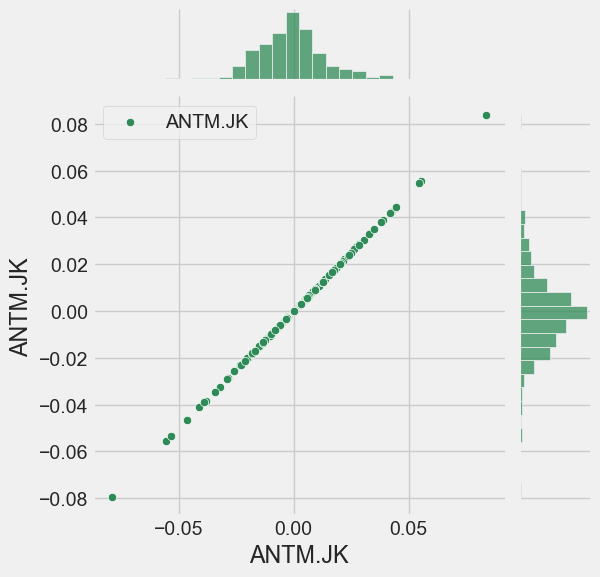

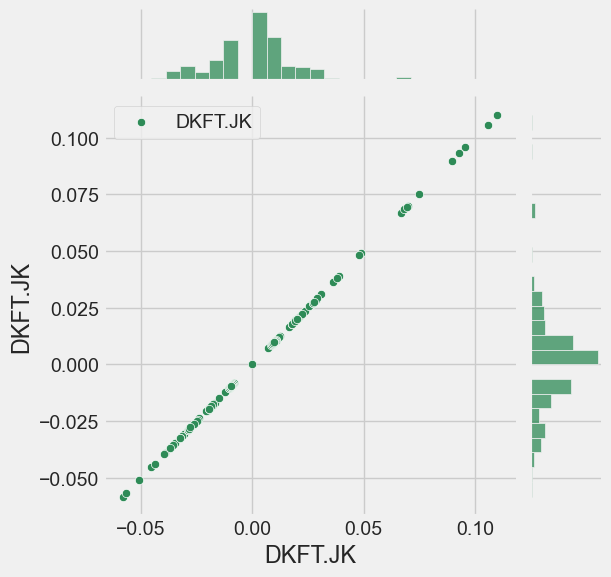

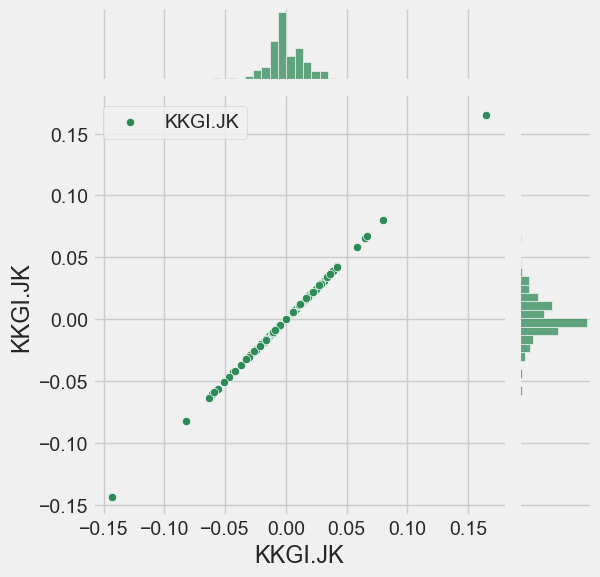

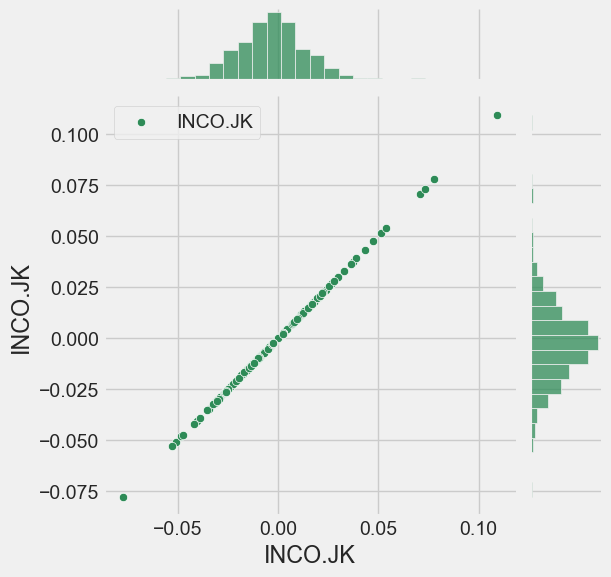

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the company names
company_names = ['ANTM.JK', 'DKFT.JK', 'KKGI.JK', 'INCO.JK']

# Plotting the jointplot for each company against itself
for company_name in company_names:
    sns.jointplot(x=company_name, y=company_name, data=returns_df, kind='scatter', color='seagreen', label=company_name)

plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


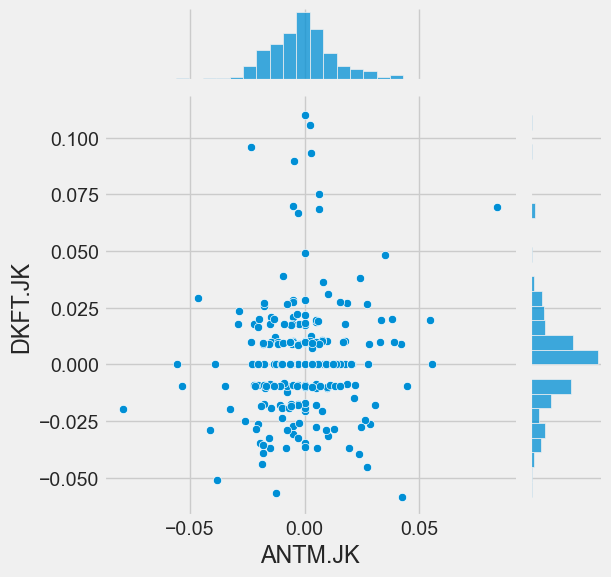

In [18]:
# We'll use joinplot to compare the daily returns of ANTM.JK and DKFT.JK
sns.jointplot(x='ANTM.JK', y='DKFT.JK', data=returns_df, kind='scatter')

plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

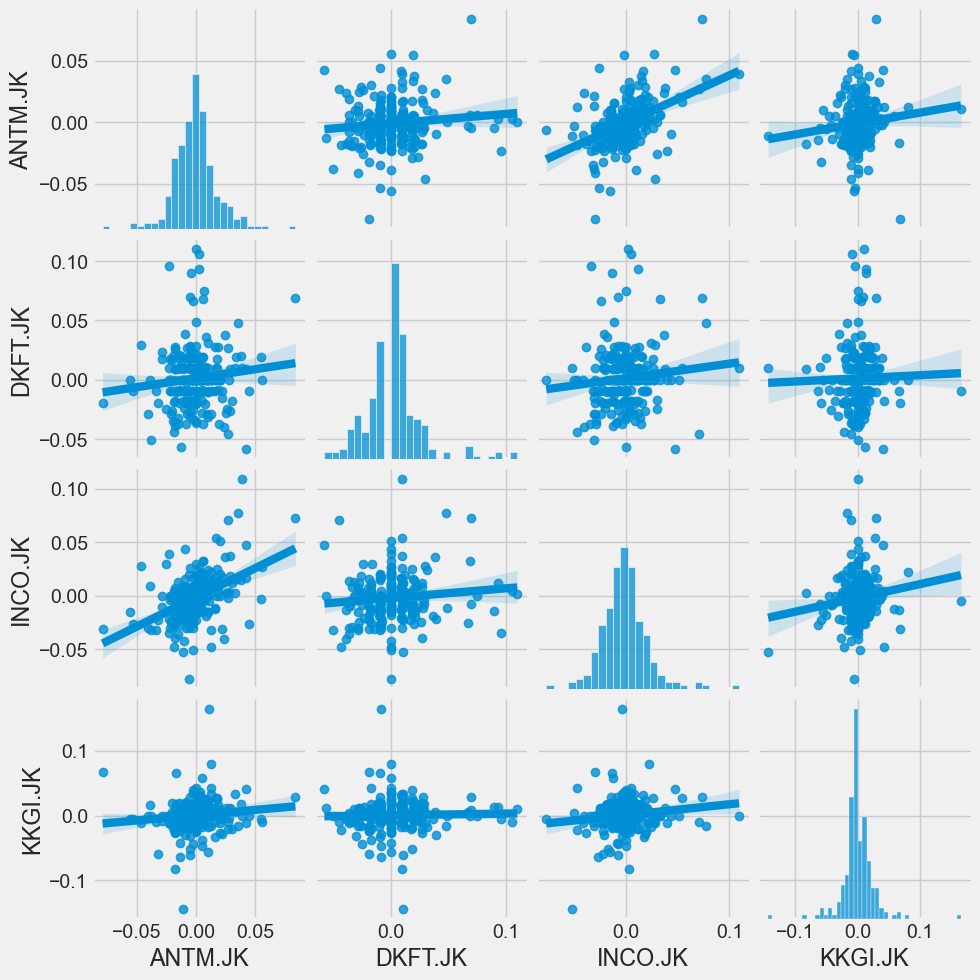

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(returns_df, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

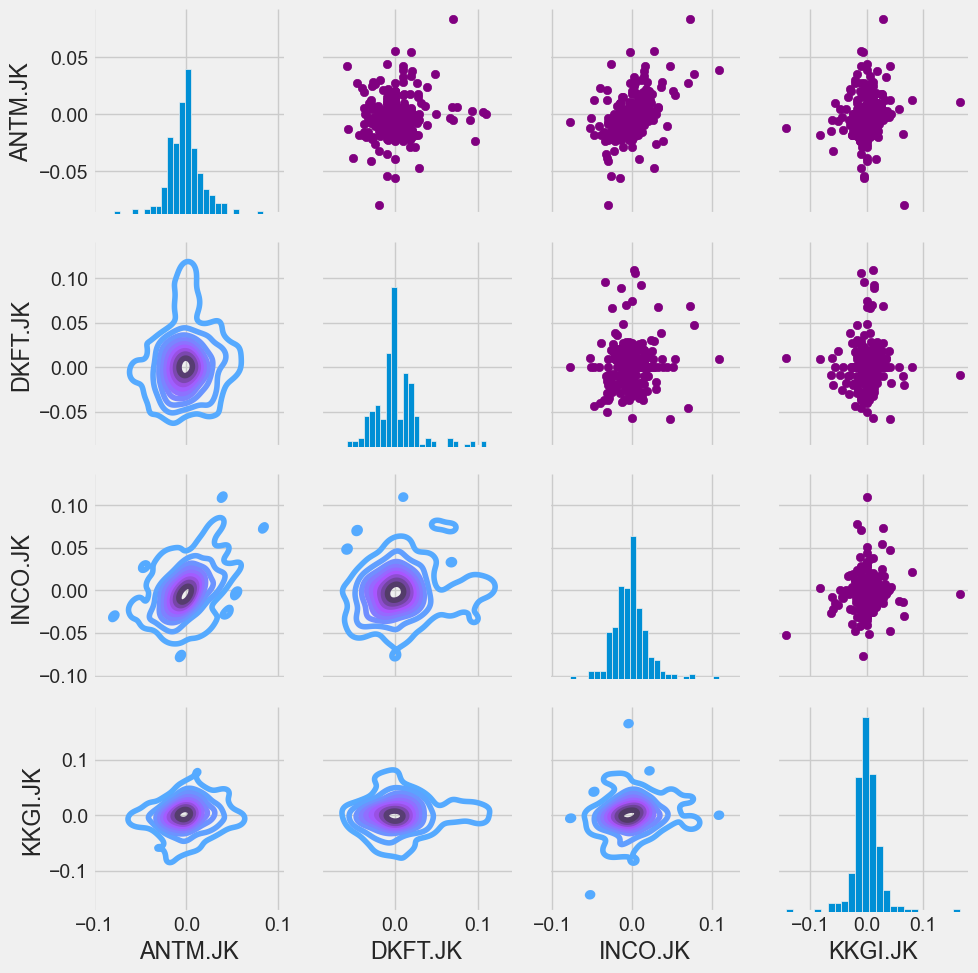

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(returns_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=25)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

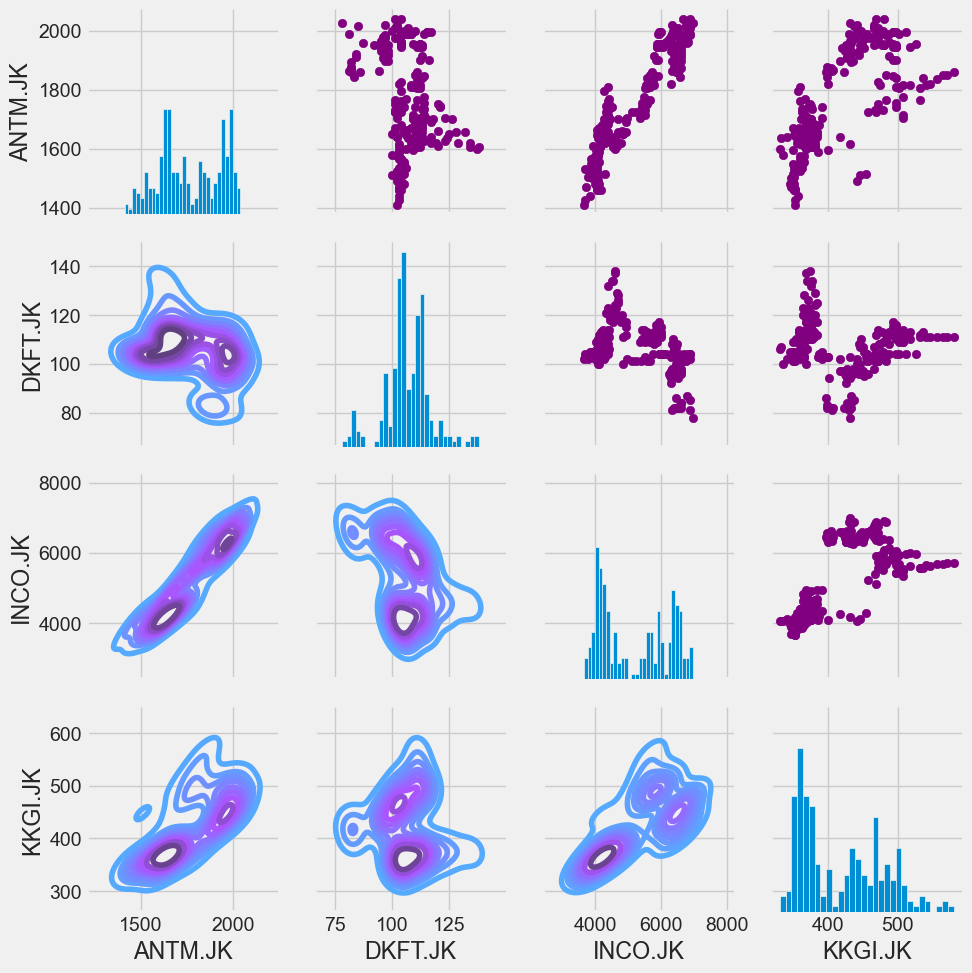

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

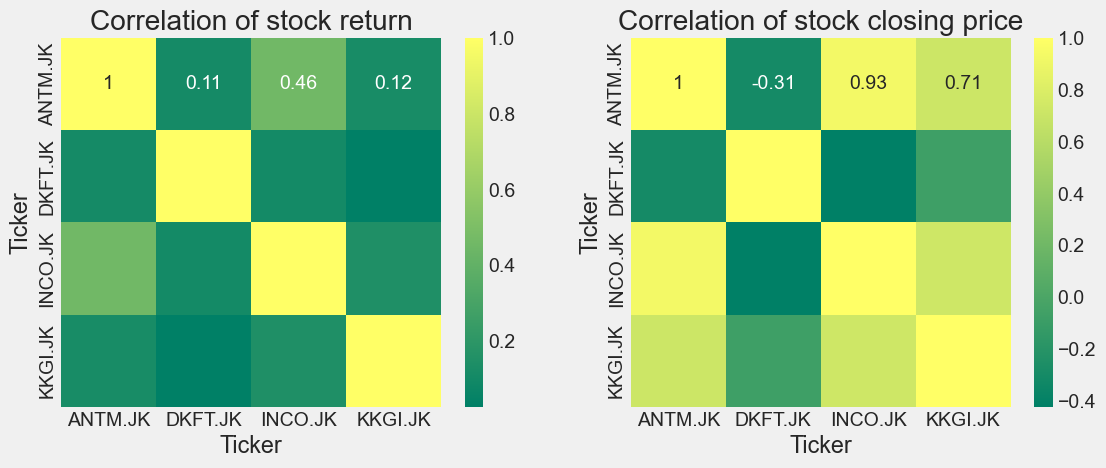

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(returns_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

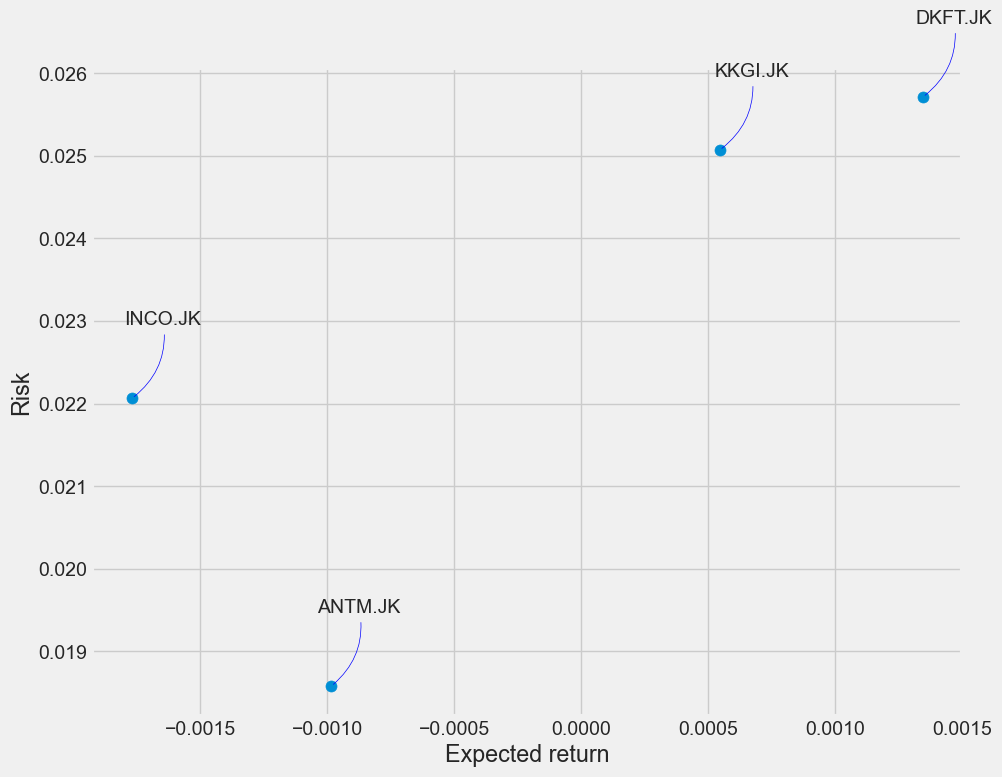

In [23]:
rets = returns_df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf
from datetime import datetime, date
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [25]:

# download the data
df = yf.download(tickers=['KKGI.JK'], period='8y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)



[*********************100%%**********************]  1 of 1 completed
/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/1447604598.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df['Close'].fillna(method='ffill')


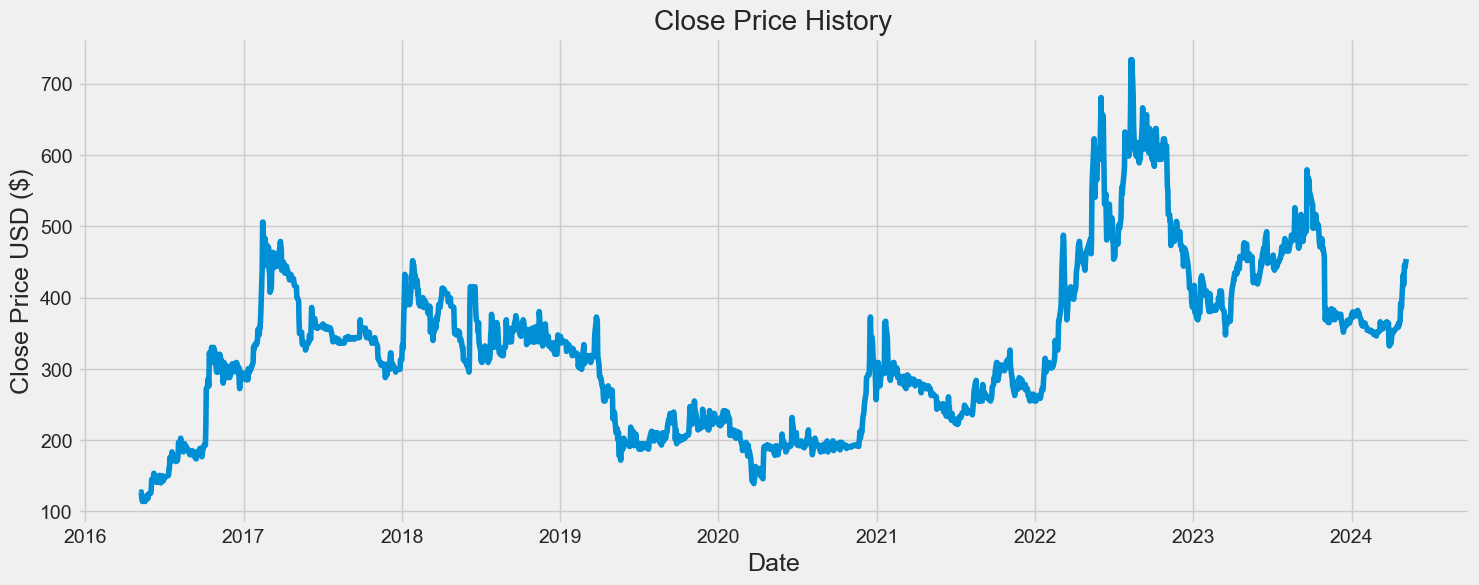

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# generate the input and output sequences
n_lookback = 182  # length of input sequences (lookback period)
n_forecast = 365  # length of output sequences (forecast period) untuk prediksi hingga tahun 2026

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=1, batch_size=3, verbose=0)



In [28]:
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)



1/1 [==============================] - 1s 539ms/step


/var/folders/r1/_dwxrcfn431751qw7slczn2m0000gn/T/ipykernel_19336/1208955941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]


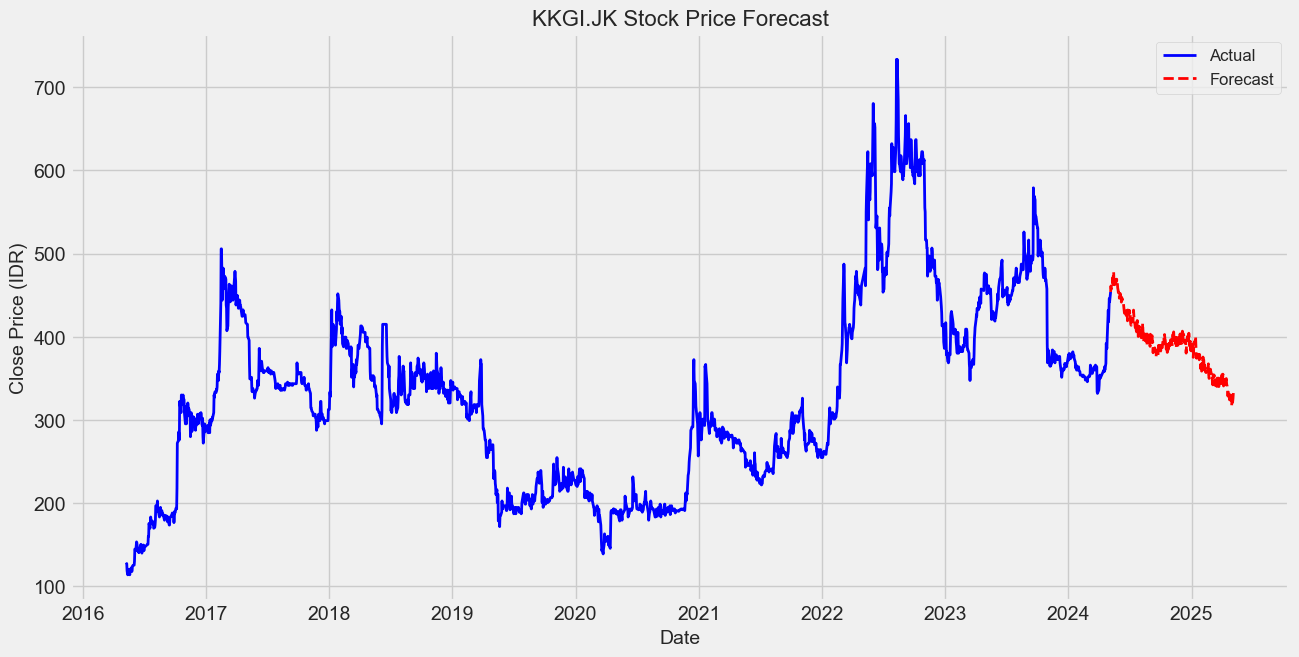

In [29]:
# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

# combine past and future dataframes
results = pd.concat([df_past, df_future]).set_index('Date')

# plot the results
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(results.index, results['Forecast'], label='Forecast', color='red', linestyle='--', linewidth=2)
plt.title('KKGI.JK Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (IDR)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [34]:
results

,Actual,Forecast
Date,,
2016-05-09,126.447876,NaN
2016-05-10,127.413124,NaN
2016-05-11,118.725868,NaN
2016-05-12,115.830116,NaN
2016-05-13,113.899612,NaN
...,...,...
2025-05-02,NaN,318.325714
2025-05-03,NaN,322.120819
2025-05-04,NaN,325.941223


In [31]:
import pickle

# Save the model using pickle
with open('lstm_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [32]:
# Save the forecast results to CSV
results.to_csv('forecast_results.csv')

# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)